In [2]:
#load light gbm model
import lightgbm as lgb
import pandas as pd
import numpy as np
import os



#load model
model_pos_path =  './model_pos_hyperopt.txt'
model_pos = lgb.Booster(model_file=model_pos_path)

#load model
model_neg_path =  './model_neg_hyperopt.txt'
model_neg = lgb.Booster(model_file=model_neg_path)




In [3]:
#load testing/analysis data from csv

X_test = pd.read_csv('X_test.csv')

y_test = pd.read_csv('y_test.csv')

df_fp_records_clean = pd.read_csv('df_fp_records_clean.csv')

df_fn_records_clean_test = pd.read_csv('df_fn_records_clean.csv')

y_12SL = pd.read_csv('y_12SL.csv')

y_test_pos = pd.read_csv('y_test_pos.csv')
y_test_neg = pd.read_csv('y_test_neg.csv')

X_test_neg = pd.read_csv('X_test_neg.csv')
X_test_pos = pd.read_csv('X_test_pos.csv')




Baseline Sensitivity (Recall): 0.4974905897114178
Baseline Precision (PPV): 0.4171488690163072
Combined Model Sensitivity (Recall): 0.09410288582183186
Combined Model Precision (PPV): 0.18315018315018314


C:\Users\Sam\AppData\Local\Temp\ipykernel_40040\3327893500.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.21530803 0.96429352 0.00313573 ... 0.92971508 0.43428907 0.2074297 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  y_pred_combined.loc[X_test_pos.index] = y_pred_pos.reshape(-1,1)  # Replace with TP model results


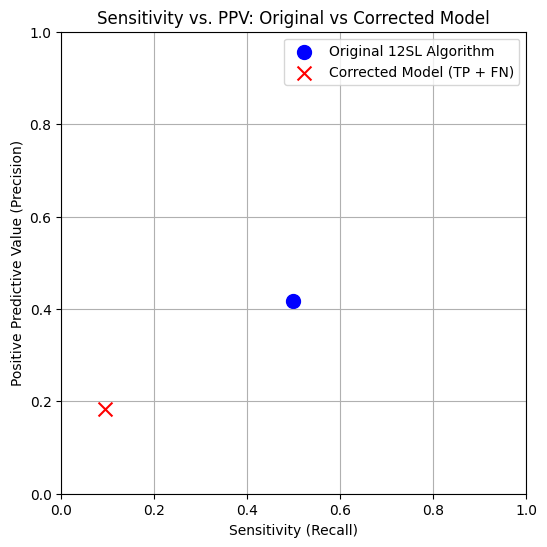

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score

#Compute performance for the original algorithm (MI_12SL)
y_true = y_test
baseline_pred = y_12SL 

sensitivity_baseline = recall_score(y_true, baseline_pred)
precision_baseline = precision_score(y_true, baseline_pred)

#Generate Combined Model Predictions
y_pred_pos = model_pos.predict(X_test_pos)
y_pred_neg = model_neg.predict(X_test_neg)

# Merge the corrected predictions into a single output
y_pred_combined = y_12SL.copy()  # original MI_12SL predictions
y_pred_combined.loc[X_test_pos.index] = y_pred_pos.reshape(-1,1)  # Replace with TP model results
y_pred_combined.loc[X_test_neg.index] = y_pred_neg.reshape(-1,1)  # Replace with FN model results

# Binarize the combined predictions
y_pred_combined_binary = (y_pred_combined > 0.5).astype(int)

# Compute performance for the Combined Model
sensitivity_combined = recall_score(y_true, y_pred_combined_binary)
precision_combined = precision_score(y_true, y_pred_combined_binary)

print("Baseline Sensitivity (Recall):", sensitivity_baseline)
print("Baseline Precision (PPV):", precision_baseline)
print("Combined Model Sensitivity (Recall):", sensitivity_combined)
print("Combined Model Precision (PPV):", precision_combined)

plt.figure(figsize=(6,6))
plt.scatter(sensitivity_baseline, precision_baseline, 
            label='Original 12SL Algorithm', color='blue', marker='o', s=100)
plt.scatter(sensitivity_combined, precision_combined, 
            label='Corrected Model (TP + FN)', color='red', marker='x', s=100)

plt.xlabel('Sensitivity (Recall)')
plt.ylabel('Positive Predictive Value (Precision)')
plt.title('Sensitivity vs. PPV: Original vs Corrected Model')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()
